In [1]:
import phoebe
import numpy as np

b = phoebe.open('after_optimize.bundle')

/home/kyle/.local/lib/python3.8/site-packages/phoebe/parameters/parameters.py:10382: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._value = np.array(value)


In [2]:
b.add_distribution({'teff@star': phoebe.gaussian_around(50),
                    'requiv@star': phoebe.gaussian_around(0.1),
                    'incl@binary': phoebe.gaussian_around(1),
                    'ecc@binary': phoebe.gaussian_around(0.05),
                    'per0@binary': phoebe.gaussian_around(5),
                    't0_supconj': phoebe.gaussian_around(0.0001),
                    'pblum@primary@lcV': phoebe.gaussian_around(0.1)},
                  allow_multiple_matches=True,
                  distribution='ball_around_opt')

<ParameterSet: 9 parameters | components: primary, binary, secondary>

In [3]:
b.add_solver('sampler.emcee', 
             nwalkers=48, 
             init_from='ball_around_opt', priors='teff_prior',
             solver='emcee_solv')

<ParameterSet: 16 parameters | qualifiers: priors, continue_from, use_server, comments, niters, burnin_factor, nlags_factor, init_from, init_from_combine, nwalkers, thin_factor, compute, init_from_requires, priors_combine, progress_every_niters, expose_failed>

In [4]:
# TODO: test without this line in the devel branch (require_priors fix commit)
#b['init_from_requires'] = ['limits']

In [5]:
b.run_solver('emcee_solv', 
             use_server='terra', niters=1e6, walltime=(48, 'hr'),
             progress_every_niters=10, 
             solution='emcee_1_sol', overwrite=True, detach=True)

# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p ~/crimpl"
# crimpl: scp crimpl_run_script.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; cd ~/crimpl; chmod +x ./crimpl_run_script.sh; ./crimpl_run_script.sh"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/kyle/crimpl/crimpl-job-2021.06.11-16.31.50/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.06.11-16.31.50/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /ho

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [32]:
b.load_job_progress('emcee_1_sol')

# crimpl: ssh terra "ls /home/users/kyle/crimpl/crimpl-job-2021.06.11-16.31.50/*"
# crimpl: ssh terra "ls /home/users/kyle/crimpl/crimpl-job-2021.06.11-16.31.50/*"
# crimpl: scp terra:/home/users/kyle/crimpl/crimpl-job-2021.06.11-16.31.50/_gRzNpTNzMCgOaINyUzGpVntPBvofmN.out.progress ./


<ParameterSet: EMPTY>

In [33]:
b.set_value('thin', 1)
b.set_value('burnin', 2500)

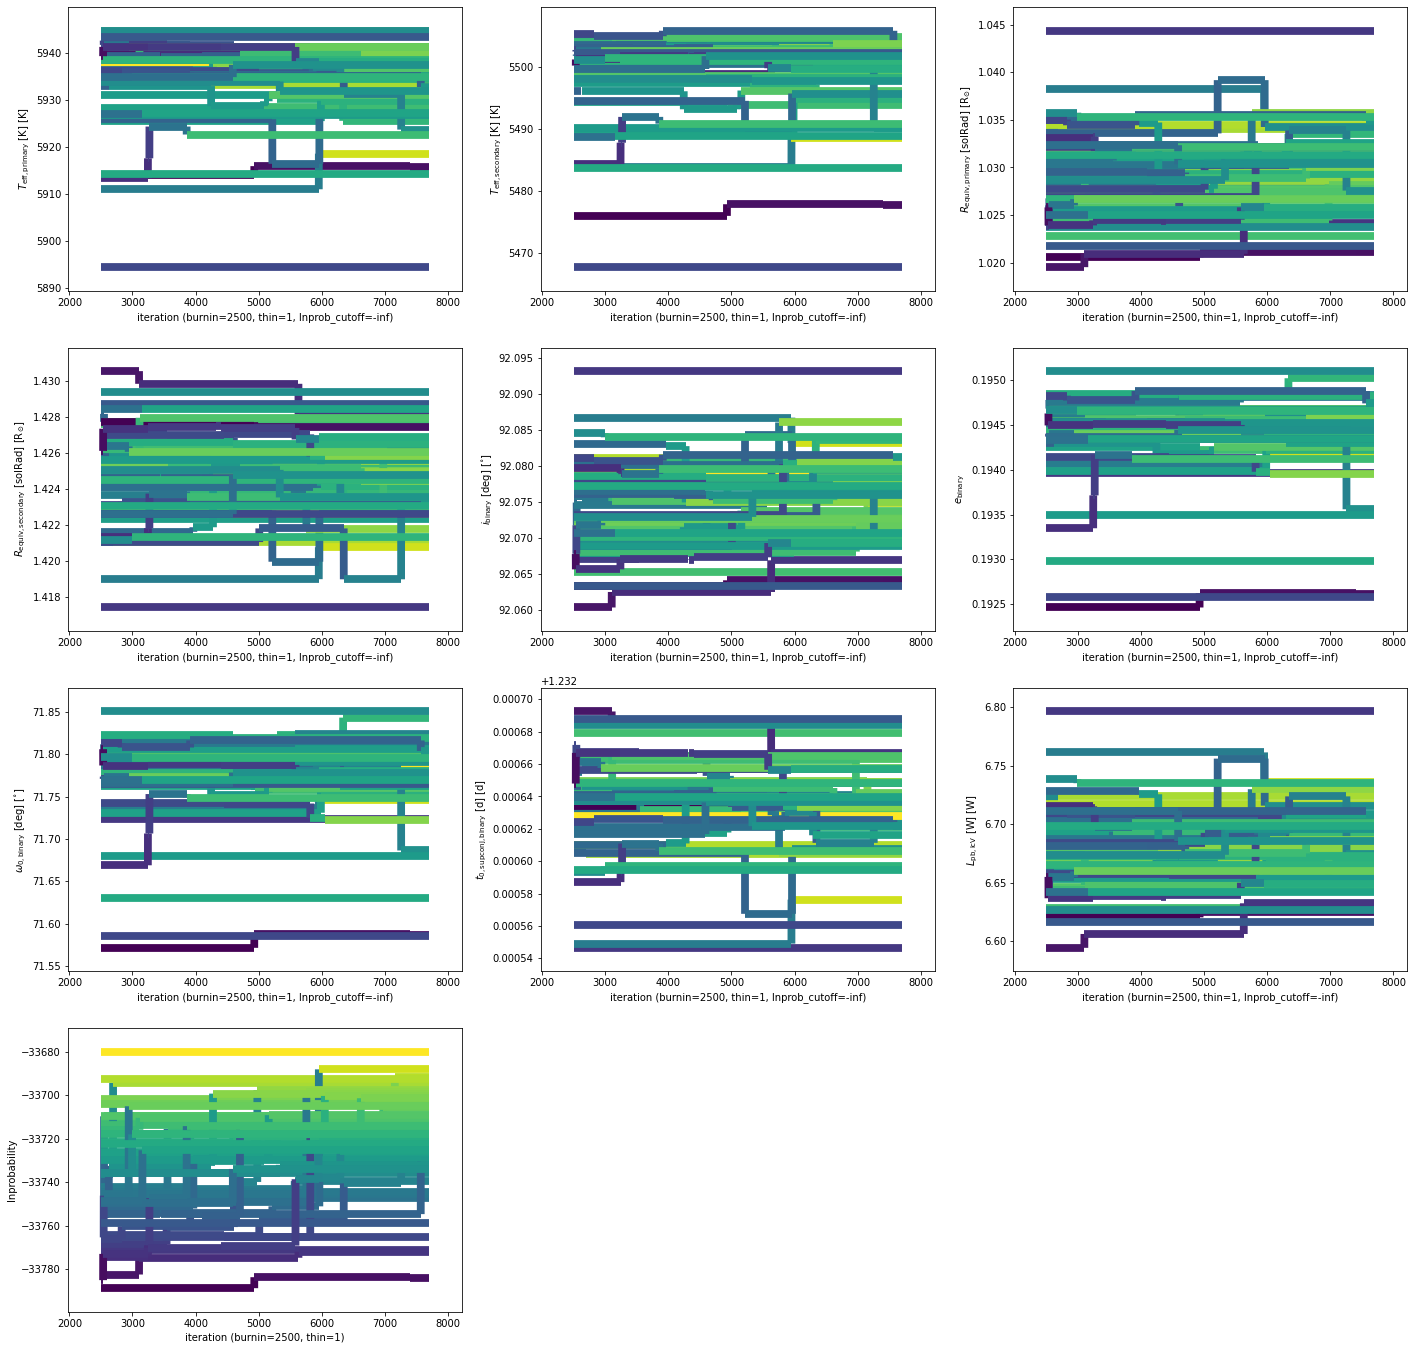

In [34]:
_ = b.plot(solution='emcee_1_sol', c='lnprobabilities', show=True)

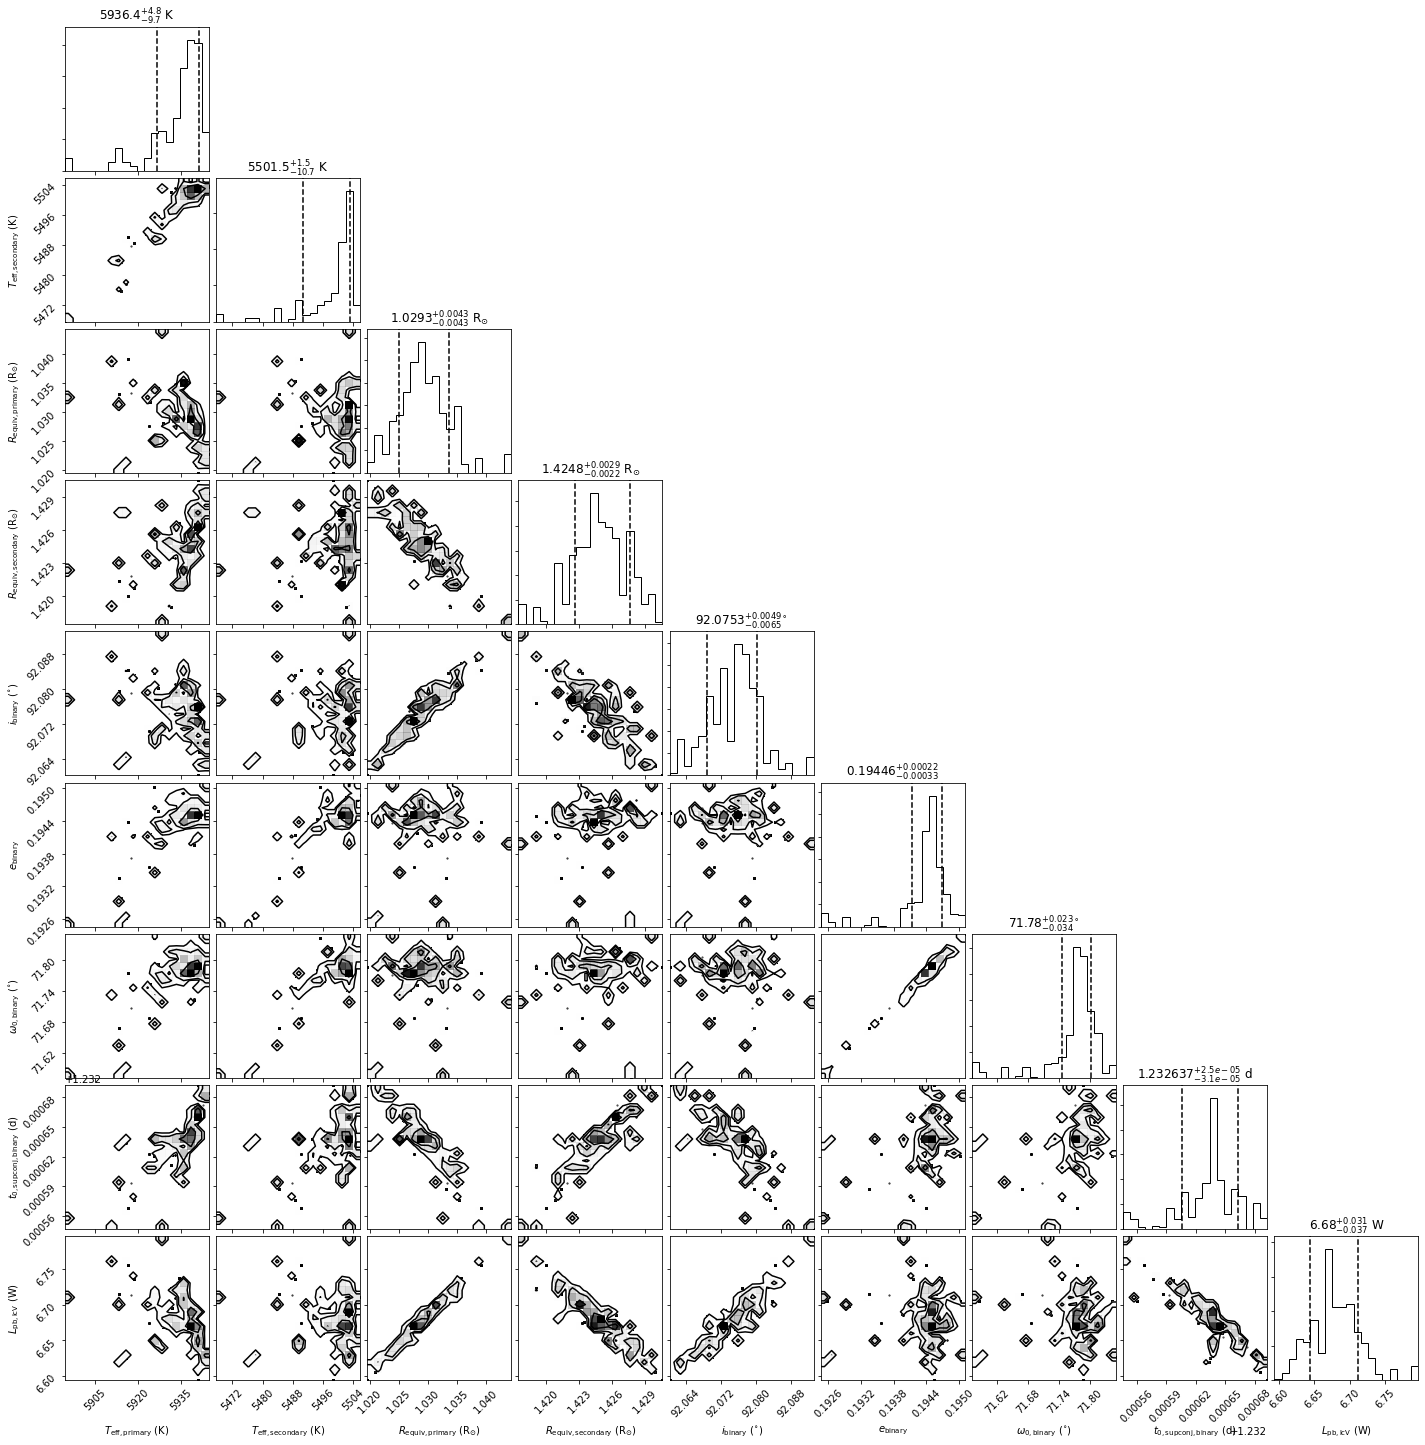

In [35]:
_ = b.plot(solution='emcee_1_sol', style='corner', show=True)

In [37]:
print(b.adopt_solution('emcee_1_sol', adopt_distributions=False, adopt_values=True))

ParameterSet: 30 parameters
           teff@primary@component: 5933.834374016288 K
         teff@secondary@component: 5498.312192341112 K
         requiv@primary@component: 1.0293230012336907 solRad
       requiv@secondary@component: 1.4247754191404758 solRad
            incl@binary@component: 92.07503188353631 deg
             ecc@binary@component: 0.19435054542727126
            per0@binary@component: 71.76901410195995 deg
      t0_supconj@binary@component: 1.2326338627632834 d
        pblum@primary@lcV@dataset: 6.67975785427405 W
C           teff@binary@component: 5678.845139437042 K
C          logg@primary@component: 4.715560340379979
C        logg@secondary@component: 4.137933964764195
C            sma@binary@component: 25.041023608785768 solRad
C         asini@primary@component: 8.415877617918575 solRad
C          incl@primary@component: 92.07503188353631 deg
C    requiv_max@primary@component: 9.189254670583079 solRad
C       asini@secondary@component: 16.608725773711456 solRad
C

In [38]:
b.kill_job('emcee_1_sol')

# crimpl: ssh terra "scancel 1649"


<ParameterSet: EMPTY>